In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px # creating a geographical heatmap

In [2]:
rainfall = pd.read_excel('UMA and MOH ug/Climate Data RF & Temp 2012 to 2018.xlsx') # Rainfall Data
tempMax = pd.read_excel('UMA and MOH ug/Temp Max 2012 to 2018.xlsx') # Maximum Temperature
tempMin = pd.read_excel('UMA and MOH ug/Temp Min 2012 to 2018.xlsx') # Minimum Temperature
rainfall=rainfall.loc[rainfall.Station!='Lira'] # Removing Lira due to inconsistencies in data
rainfall.reset_index(inplace=True,drop=True)# reseting indices after removing Lira
coord = rainfall[['LAT','LON']]# latitudes and longitudes of the different districts

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
rainfall.head()

Station     LON    LAT  Year  Jan   Feb   Mar    Apr    May    Jun    Jul  \
0   Kitgum   32.883  3.300  2012  0.0   0.9   8.7  267.6  110.0   84.7  140.0   
1   Kasese   30.100  0.183  2012  0.7  22.8  18.5  302.8  124.1   13.8   22.9   
2      Gulu  32.283  2.783  2012  0.0  13.6  10.0  217.0  218.8  201.4  106.0   
3      Arua  30.917  3.050  2012  0.0   4.3  18.3  142.8  110.8  109.1  355.5   
4  Masindi   31.717  1.683  2012  0.0  15.8  54.3  237.6  170.7   85.4  145.0   

     Aug    Sep    Oct    Nov    Dec  Total Rainfall  
0  175.6  161.6  220.1   63.1   30.3          1262.6  
1   36.6   51.3  276.9   93.2  123.1          1086.7  
2  198.6  401.7  214.7  111.4   52.6          1745.8  
3  181.7  226.0  336.7   56.4   47.2          1588.8  
4  130.9  282.5  127.6  131.2  174.9          1555.9

In [4]:
tempmin = {'2012': tempMin.loc[tempMin.YEAR==2012].T,
           '2013': tempMin.loc[tempMin.YEAR==2013].T,
           '2014': tempMin.loc[tempMin.YEAR==2014].T,
           '2015': tempMin.loc[tempMin.YEAR==2015].T,
           '2016': tempMin.loc[tempMin.YEAR==2016].T,
           '2017': tempMin.loc[tempMin.YEAR==2017].T,
           '2018': tempMin.loc[tempMin.YEAR==2018].T,
          }
count=0 # Index flag
for i in tempmin.keys():# Looping through the tempmin dictionary
    tempmin[i]['Station']=tempMax.columns
    tempmin[i].rename(columns={count+0:'Jan_min',count+1:"Feb_min",count+2:'Mar_min',
                          count+3:'Apr_min',count+4:'May_min',count+5:'Jun_min',count+6:'Jul_min',count+7:'Aug_min',count+8:'Sept_min',count+9:'Oct_min',count+10:'Nov_min',count+11:'Dec_min',},inplace=True)
    d=tempmin[i].pop('Station')# Removing 
    tempmin[i].insert(0,d.name,d)
    tempmin[i]=tempmin[i].loc[tempmin[i].Station !='MONTH']
    tempmin[i]=tempmin[i].loc[tempmin[i].Station !='YEAR']
    tempmin[i]['LAT']=coord['LAT'][0:18].values
    tempmin[i]['LON']=coord['LON'][0:18].values
    tempmin[i]['Year']=int(i)
        
   # if(i!='2018'):
    tempmin[i]["Minimum_Temperature"]=tempmin[i][['Jan_min','Feb_min','Mar_min','May_min','Jun_min','Jul_min','Aug_min','Sept_min','Oct_min','Nov_min','Dec_min']].min(axis=1)
   # else:
    #    tempmin[i]["Minimum_Temperature"]=tempmin[i][['Jan','Feb','Mar','May','Jun']].min(axis=1)
    count=count+12

In [5]:
tempmax = {'2012': tempMax.loc[tempMax.YEAR==2012].T,
           '2013': tempMax.loc[tempMax.YEAR==2013].T,
           '2014': tempMax.loc[tempMax.YEAR==2014].T,
           '2015': tempMax.loc[tempMax.YEAR==2015].T,
           '2016': tempMax.loc[tempMax.YEAR==2016].T,
           '2017': tempMax.loc[tempMax.YEAR==2017].T,
           '2018': tempMax.loc[tempMax.YEAR==2018].T,
          }
count=0
for i in tempmax.keys():
    tempmax[i]['Station']=tempMax.columns
    tempmax[i].rename(columns={count+0:'Jan_max',count+1:"Feb_max",count+2:'Mar_max',
                          count+3:'Apr_max',count+4:'May_max',count+5:'Jun_max',count+6:'Jul_max',count+7:'Aug_max',count+8:'Sept_max',count+9:'Oct_max',count+10:'Nov_max',count+11:'Dec_max',},inplace=True)
    d=tempmax[i].pop('Station')
    tempmax[i].insert(0,d.name,d)
    tempmax[i]=tempmax[i].loc[tempmax[i].Station !='MONTH']
    tempmax[i]=tempmax[i].loc[tempmax[i].Station !='YEAR']
    tempmax[i]['LAT']=coord['LAT'][0:18].values
    tempmax[i]['LON']=coord['LON'][0:18].values
    
    #if(i!='2018'):
    tempmax[i]["Maximum_Temperature"]=tempmax[i][['Jan_max','Feb_max','Mar_max','May_max','Jun_max','Jul_max','Aug_max','Sept_max','Oct_max','Nov_max','Dec_max']].max(axis=1)
    #else:
     # tempmax[i]["Maximum_Temperature"]=tempmax[i][['Jan','Feb','Mar','May','Jun']].max(axis=1)
    count=count+12

In [6]:
fig = px.density_mapbox(tempmax['2012'],lat='LAT',lon='LON',z='Maximum_Temperature',radius=20,center=dict(lat=tempmax['2012'].LAT.mean(),
                        lon=tempmax['2012'].LON.mean()),zoom=6,mapbox_style='open-street-map',height=900)
fig.show()
# Figure showing the variations of maximum temperatures in selected districts. This map shows the hottest of the selected stations

In [7]:
fig = px.density_mapbox(tempmin['2012'],lat='LAT',lon='LON',z='Minimum_Temperature',radius=20,center=dict(lat=tempmin['2012'].LAT.mean(),
                        lon=tempmin['2012'].LON.mean()),zoom=6,mapbox_style='open-street-map',height=900)
fig.show()
# Figure showing minimum temperatures of selected districts, Heatmap shows the coldest of the selected stations

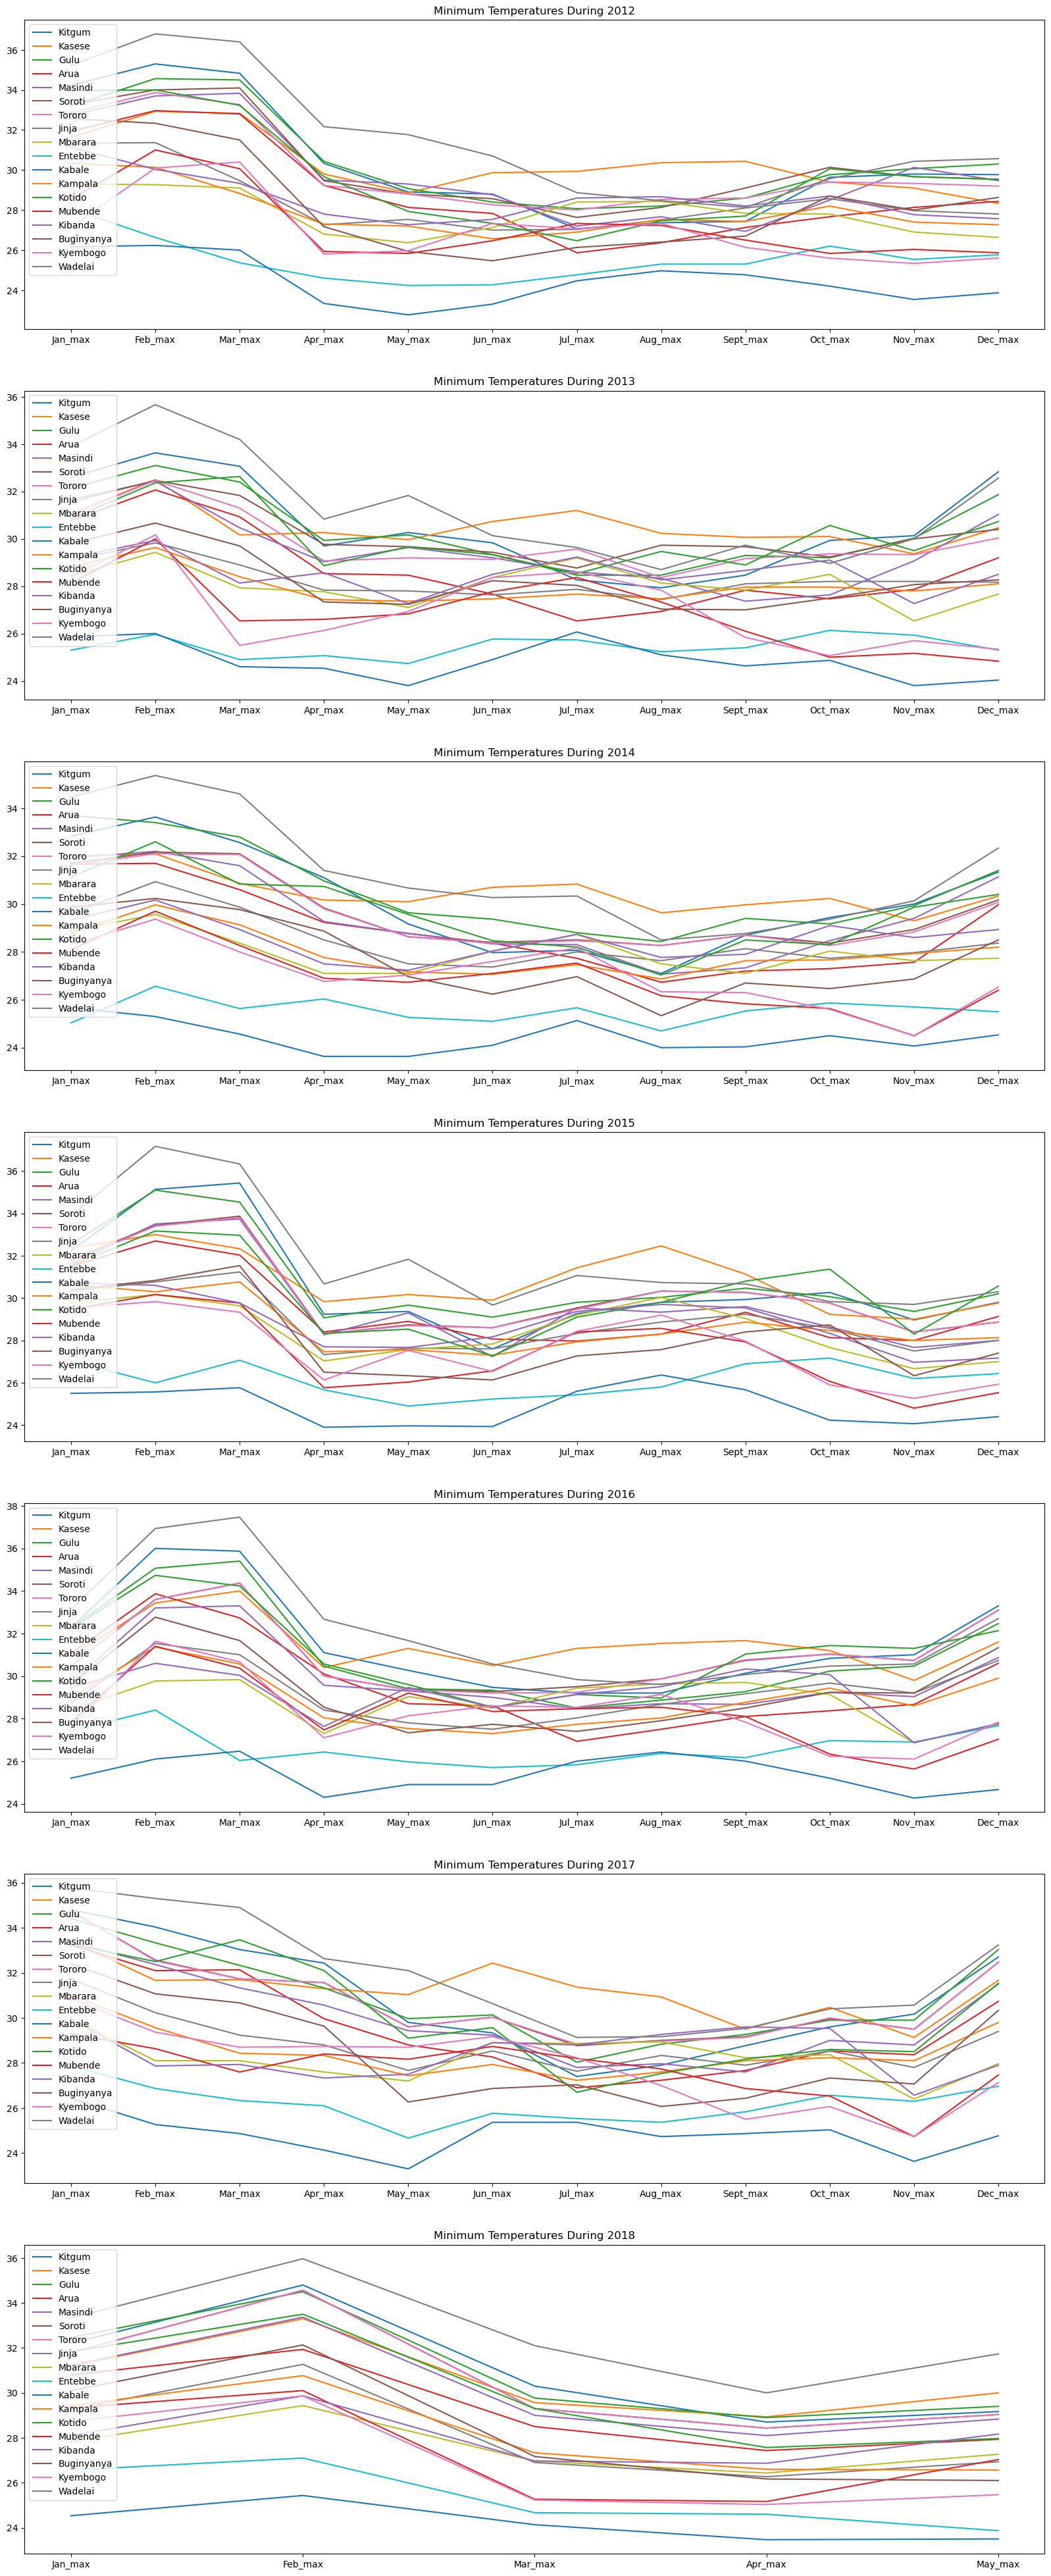

True


In [137]:
#Rainfall and Temperature Histograms for 2012
plt.figure(figsize=(20,50))#Setting the size of the figure of subplots
plt.ion()

months=['Jan_max','Feb_max','Mar_max','Apr_max','May_max','Jun_max','Jul_max','Aug_max','Sept_max','Oct_max','Nov_max','Dec']
stations=tempmin['2012']['Station'].values

plt.subplot(7,1,1)
plt.plot(months,tempmax['2012'][months].T,label=stations)
plt.title("Minimum Temperatures During 2012")
plt.legend(loc='upper left')

plt.subplot(7,1,2)
plt.plot(months,tempmax['2013'][months].T,label=stations)
plt.title("Minimum Temperatures During 2013")
plt.legend(loc='upper left')

plt.subplot(7,1,3)
plt.plot(months,tempmax['2014'][months].T,label=stations)
plt.title("Minimum Temperatures During 2014")
plt.legend(loc='upper left')

plt.subplot(7,1,4)
plt.plot(months,tempmax['2015'][months].T,label=stations)
plt.title("Minimum Temperatures During 2015")
plt.legend(loc='upper left')

plt.subplot(7,1,5)
plt.plot(months,tempmax['2016'][months].T,label=stations)
plt.title("Minimum Temperatures During 2016")
plt.legend(loc='upper left')

plt.subplot(7,1,6)
plt.plot(months,tempmax['2017'][months].T,label=stations)
plt.title("Minimum Temperatures During 2017")
plt.legend(loc='upper left')

plt.subplot(7,1,7)
plt.plot(months[:5],tempmax['2018'][months[:5]].T,label=stations)
plt.title("Minimum Temperatures During 2018")
plt.legend(loc='upper left')

plt.show()
print(plt.isinteractive())

In [140]:
rainfall_data = {'2012':rainfall.loc[rainfall.Year==2012],
            '2013':rainfall.loc[rainfall.Year==2013],
            '2014':rainfall.loc[rainfall.Year==2014],
            '2015':rainfall.loc[rainfall.Year==2015],
            '2016':rainfall.loc[rainfall.Year==2016],
            '2017':rainfall.loc[rainfall.Year==2017],
            '2018':rainfall.loc[rainfall.Year==2018],}

for i in rainfall_data.keys():
    rainfall_data[i] = rainfall_data[i].loc[rainfall_data[i].Station != 'Lira']
    rainfall_data[i].reset_index(inplace=True,drop=True)

<Axes: xlabel='Station', ylabel='Total Rainfall'>

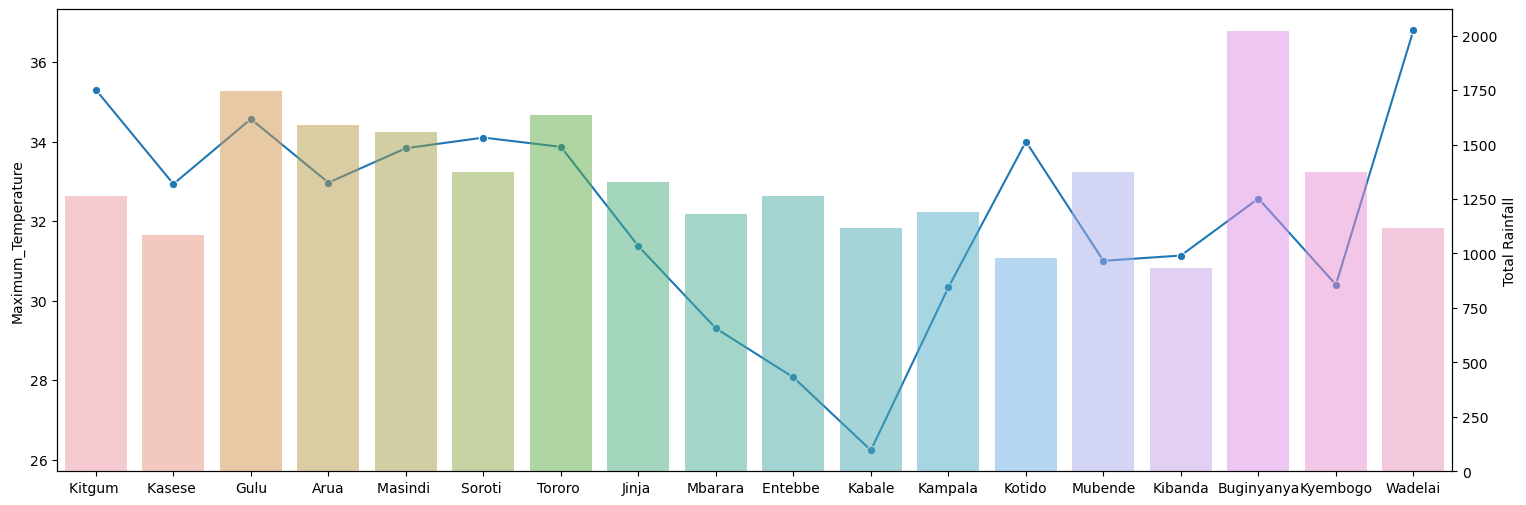

In [141]:
import matplotlib
matplotlib.rc_file_defaults()
ax1=sns.set_style(style=None,rc=None)
fig, ax1 = plt.subplots(figsize=(18,6))

sns.lineplot(data=tempmax['2012']['Maximum_Temperature'],marker='o',sort=False,ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data=rainfall_data['2012'][['Total Rainfall',
                                     'Station']],x='Station',y='Total Rainfall',alpha=0.5,ax=ax2)

<Axes: xlabel='Station', ylabel='Total Rainfall'>

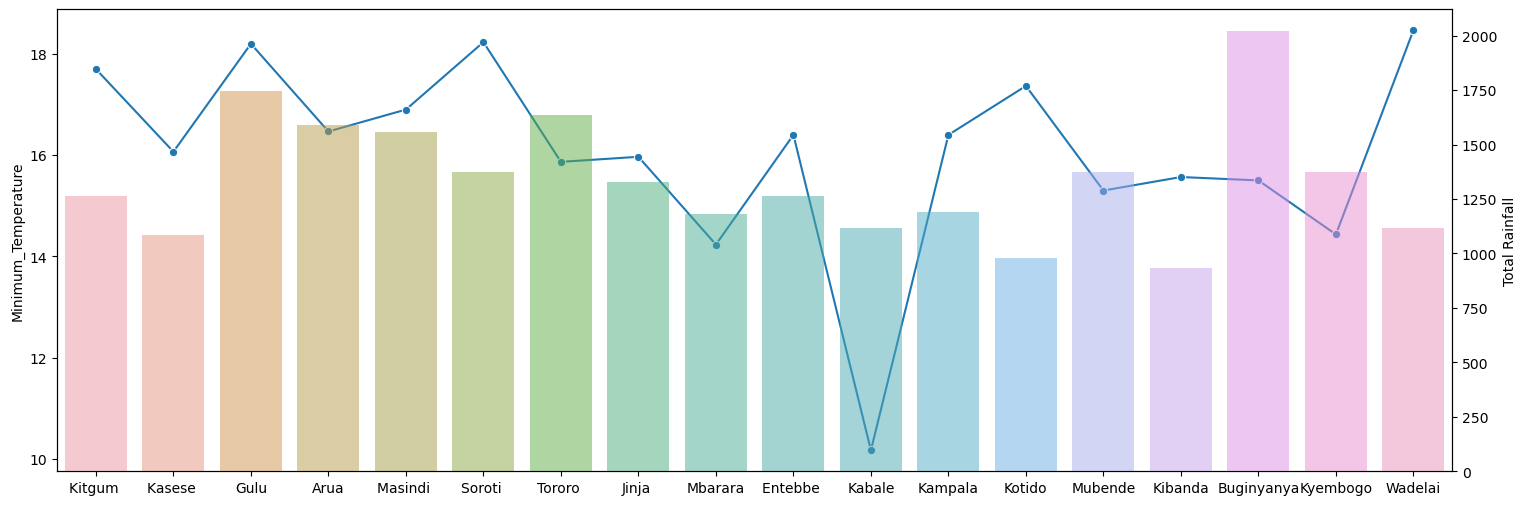

In [142]:
import matplotlib
matplotlib.rc_file_defaults()
ax1=sns.set_style(style=None,rc=None)
fig, ax1 = plt.subplots(figsize=(18,6))

sns.lineplot(data=tempmin['2012']['Minimum_Temperature'],marker='o',sort=False,ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data=rainfall_data['2012'][['Total Rainfall',
                                     'Station']],x='Station',y='Total Rainfall',alpha=0.5,ax=ax2)

Attempting to predict the rainfall of a single station using the Rainfall dataset alone

In [8]:
# Predicting December rainfall of 2018 Wadelai
wadelai = rainfall.loc[rainfall.Station == "Wadelai"].drop(['Station','Total Rainfall'],axis=1)
#wadelai= wadelai.reset_index(inplace=True)
wadelai.reset_index(inplace=True,drop=True)

In [9]:
wadelai

LON    LAT  Year   Jan   Feb    Mar    Apr    May    Jun    Jul    Aug  \
0  31.4  2.733  2012   3.0   6.0   29.0  156.0  128.0   85.0  111.0   87.0   
1  31.4  2.733  2013  34.0  17.0  133.0  144.0  116.0   56.0   85.0  126.0   
2  31.4  2.733  2014   8.0  10.0  106.0  139.0  109.0   72.0   88.0  162.0   
3  31.4  2.733  2015   0.0  17.0   70.0  194.0  120.0  118.0  107.0   79.0   
4  31.4  2.733  2016   0.0  14.7   95.0  154.2  139.5   47.0   82.4  107.0   
5  31.4  2.733  2017   0.0   0.0   54.4  101.4  101.0  107.9  100.4  172.5   
6  31.4  2.733  2018   0.0   0.0    0.0  254.7   47.5   38.9   28.0   66.5   

     Sep    Oct    Nov   Dec  
0  100.0  214.0  109.0  91.0  
1  188.0  130.0  180.0  12.0  
2  158.0  176.0  181.0   0.0  
3   63.0  155.0  160.0  68.0  
4  110.4  129.0  135.6   6.8  
5  151.6  176.2  177.6   0.0  
6  107.1   99.3  124.9  40.4

In [10]:
wadelai.columns

Index(['LON', 'LAT', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [11]:
# In the event that we are trying to predict rainfall in December, the column Dec becomes our target
wadelaifeatures=wadelai.drop('Dec',axis=1)
wadelaitarget=wadelai.loc[:,['Dec']]

In [12]:
wadelaifeatures

LON    LAT  Year   Jan   Feb    Mar    Apr    May    Jun    Jul    Aug  \
0  31.4  2.733  2012   3.0   6.0   29.0  156.0  128.0   85.0  111.0   87.0   
1  31.4  2.733  2013  34.0  17.0  133.0  144.0  116.0   56.0   85.0  126.0   
2  31.4  2.733  2014   8.0  10.0  106.0  139.0  109.0   72.0   88.0  162.0   
3  31.4  2.733  2015   0.0  17.0   70.0  194.0  120.0  118.0  107.0   79.0   
4  31.4  2.733  2016   0.0  14.7   95.0  154.2  139.5   47.0   82.4  107.0   
5  31.4  2.733  2017   0.0   0.0   54.4  101.4  101.0  107.9  100.4  172.5   
6  31.4  2.733  2018   0.0   0.0    0.0  254.7   47.5   38.9   28.0   66.5   

     Sep    Oct    Nov  
0  100.0  214.0  109.0  
1  188.0  130.0  180.0  
2  158.0  176.0  181.0  
3   63.0  155.0  160.0  
4  110.4  129.0  135.6  
5  151.6  176.2  177.6  
6  107.1   99.3  124.9

In [13]:
wadelaitarget

Dec
0  91.0
1  12.0
2   0.0
3  68.0
4   6.8
5   0.0
6  40.4

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(wadelaifeatures, wadelaitarget, test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 0.1)

In [16]:
reg.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [17]:
predictions = reg.predict(xtest)

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(ytest,predictions)

38.244691281581794

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest,predictions)

1725.0269064715985

In [21]:
predictions

array([[ 36.55745407],
       [-10.04683663]])

In [22]:
ytest

Dec
0  91.0
1  12.0

Now to try out cross-validation. Since our sample is small, the Leave-One-out method of cross-validation will be suitable for this scenario


In [23]:
from sklearn.model_selection import KFold

In [24]:
kf = KFold(n_splits=7)
reg3=Ridge(alpha=.1)
n = 0
for xtraining,ytraining in kf.split(wadelai):
    X = wadelai.iloc[xtraining]
    Y = wadelai.iloc[ytraining]
    Xtrain = X.drop('Dec',axis=1)
    Xtest = X.loc[:,['Dec']]
    Ytrain = Y.drop('Dec',axis=1)
    Ytest = Y.loc[:,['Dec']]
    reg3.fit(Xtrain,Xtest)
    predictions3 = reg3.predict(Ytrain)
    print(f"Epoch {n}: {mean_absolute_error(Ytest,predictions3)}\n")
    n+=1
    
    

Epoch 0: 67.3522915259827

Epoch 1: 36.57271567148417

Epoch 2: 9.808813139874623

Epoch 3: 23.496826576519695

Epoch 4: 43.89862786984942

Epoch 5: 15.469279056440072

Epoch 6: 21.649216165277963



From the result above, only two epochs were above 38.244 in mean absolute error which is a resonable improvement. 
However, without enough samples and features to improve accuracy, it's difficult to improve it any further.

The next step shall be to try using different regression models to find whether there is a model that performs better with this dataset.

In [25]:
# Attempting to use all stations to improve the accuracy of the Model.
from sklearn.model_selection import cross_val_score

rainfalltrain = rainfall.drop(['Station','Total Rainfall'], axis=1)

features3=rainfalltrain.drop('Dec',axis=1)
target3=rainfalltrain.loc[:,['Dec']]
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(features3, target3, test_size=0.2,random_state=42)
reg3 = Ridge(alpha = 0.1)
reg3.fit(xtrain3,ytrain3)
prediction=reg3.predict(xtest3)
print(mean_absolute_error(ytest3,prediction))

44.468112713534545


In [26]:
# Using cross-validation

kf = KFold(n_splits=7)
reg3=Ridge(alpha=.1)
n = 0
for xtraining,ytraining in kf.split(rainfalltrain):
    X = rainfalltrain.iloc[xtraining]
    Y = rainfalltrain.iloc[ytraining]
    Xtrain = X.drop('Dec',axis=1)
    Xtest = X.loc[:,['Dec']]
    Ytrain = Y.drop('Dec',axis=1)
    Ytest = Y.loc[:,['Dec']]
    reg3.fit(Xtrain,Xtest)
    predictions3 = reg3.predict(Ytrain)
    print(f"Epoch {n}: {mean_absolute_error(Ytest,predictions3)}\n")
    n+=1
    
    

Epoch 0: 89.17638255544458

Epoch 1: 40.92812100166404

Epoch 2: 45.74811579277164

Epoch 3: 54.36663879199937

Epoch 4: 32.19955949628626

Epoch 5: 60.3718599935728

Epoch 6: 84.03747531255641



In [27]:
tempmin['2017']

Station  Jan_min  Feb_min  Mar_min  Apr_min  May_min  Jun_min  \
Kitgum          Kitgum   19.633   20.800   20.967   20.567   19.600   18.900   
Kasese          Kasese   15.467   16.833   16.367   17.167   16.533   15.567   
Gulu              Gulu   19.767   19.767   20.267   19.633   19.767   19.667   
Arua              Arua   17.300   18.333   18.800   18.433   18.000   17.367   
Masindi        Masindi   17.067   18.333   18.667   18.967   18.667   18.167   
Soroti          Soroti   18.967   20.033   19.800   19.533   18.900   18.567   
Tororo          Tororo   16.300   17.700   17.800   17.633   18.533   17.767   
Jinja            Jinja   15.867   17.367   17.567   17.767   17.433   16.700   
Mbarara        Mbarara   15.900   16.300   16.333   16.433   16.400   15.867   
Entebbe        Entebbe   17.867   18.600   18.967   19.467   18.933   18.267   
Kabale          Kabale   10.933   11.367   11.800   12.133   12.467   10.633   
Kampala        Kampala   17.800   18.467   18.400   18.933   18.700   18.500   
Kotido          Kotido   19.667   20.333   20.700   19.667   19.067   19.100   
Mubende        Mubende   17.267   18.267   17.867   18.300   18.467   18.133   
Kibanda        Kibanda   17.300   17.833   17.800   17.667   17.500   17.367   
Buginyanya  Buginyanya   15.167   16.367   16.467   16.133   16.233   15.667   
Kyembogo      Kyembogo   15.700   16.433   15.900   16.433   16.500   15.500   
Wadelai        Wadelai   20.167   21.267   21.400   20.700   20.533   19.833   

            Jul_min  Aug_min  Sept_min  Oct_min  Nov_min  Dec_min       LAT  \
Kitgum       18.100   17.900    18.300   18.800   18.700   18.500  3.300000   
Kasese       14.700   14.867    13.733   13.333   12.600   12.000  0.183000   
Gulu         18.633   18.533    18.433   19.067   17.533   18.733  2.783000   
Arua         16.833   17.000    17.133   17.400   16.933   17.067  3.050000   
Masindi      17.600   17.400    17.300   18.000   17.433   17.300  1.683000   
Soroti       17.367   17.200    17.200   17.467   16.767   17.033  1.717000   
Tororo       17.267   17.500    17.367   17.500   17.033   17.133  0.683000   
Jinja        16.067   16.167    16.200   16.567   15.900   15.867  0.470000   
Mbarara      15.867   16.633    16.367   16.133   15.633   15.300 -0.600000   
Entebbe      17.900   17.800    18.133   18.867   18.500   18.233  0.045278   
Kabale       10.600   12.500    12.600   12.367   12.633   11.733 -1.250000   
Kampala      18.000   17.900    18.100   18.533   18.000   18.067  0.317000   
Kotido       17.967   18.333    18.567   18.367   17.500   19.000  3.017000   
Mubende      17.533   17.533    17.333   17.533   16.900   17.100  0.580000   
Kibanda      17.200   17.467    17.433   17.400   16.467   16.433 -0.520000   
Buginyanya   15.533   15.767    15.800   15.433   14.933   15.000  1.283000   
Kyembogo     14.967   15.433    14.833   14.567   14.233   13.800  0.683000   
Wadelai      19.000   18.667    18.867   19.667   18.700   19.300  2.733000   

                LON  Year  Minimum_Temperature  
Kitgum      32.8830  2017               17.900  
Kasese      30.1000  2017               12.000  
Gulu        32.2830  2017               17.533  
Arua        30.9170  2017               16.833  
Masindi     31.7170  2017               17.067  
Soroti      33.6170  2017               16.767  
Tororo      34.1670  2017               16.300  
Jinja       33.1830  2017               15.867  
Mbarara     30.6830  2017               15.300  
Entebbe     32.4500  2017               17.800  
Kabale      29.9830  2017               10.600  
Kampala     32.6170  2017               17.800  
Kotido      34.1000  2017               17.500  
Mubende     31.3666  2017               16.900  
Kibanda     31.2200  2017               16.433  
Buginyanya  34.3670  2017               14.933  
Kyembogo    30.3330  2017               13.800  
Wadelai     31.4000  2017               18.667

In [28]:
# combining all the temperature and  to improve the model.
frames = [tempmin["2012"],tempmin["2013"],tempmin["2014"],tempmin["2015"],tempmin["2016"],tempmin["2017"],tempmin["2018"]]
newtempmin = pd.concat(frames)
newtempmin.reset_index(inplace=True,drop=True)

In [29]:
combined = rainfalltrain.join(newtempmin.drop(['LAT','LON','Year'],axis=1))

In [30]:
combined.apply(pd.isnull).sum()

LON                    0
LAT                    0
Year                   0
Jan                    0
Feb                    0
Mar                    0
Apr                    0
May                    0
Jun                    0
Jul                    0
Aug                    0
Sep                    0
Oct                    0
Nov                    0
Dec                    0
Station                0
Jan_min                0
Feb_min                0
Mar_min                0
Apr_min                0
May_min                0
Jun_min                0
Jul_min                0
Aug_min                0
Sept_min               0
Oct_min                0
Nov_min                0
Dec_min                0
Minimum_Temperature    0
dtype: int64

In [31]:
framesmax = [tempmax["2012"],tempmax["2013"],tempmax["2014"],tempmax["2015"],tempmax["2016"],tempmax["2017"],tempmax["2018"]]
newtempmax = pd.concat(framesmax)
newtempmax.reset_index(inplace=True,drop=True)

In [32]:
dataset = combined.join(newtempmax.drop(['LAT','LON','Station'],axis=1))

In [33]:
kf = KFold(n_splits=20)
reg4=Ridge(alpha=.1)
n = 1
for xtraining,ytraining in kf.split(dataset):
    X = dataset.drop('Station',axis=1).iloc[xtraining]
    Y = dataset.drop('Station',axis=1).iloc[ytraining]
    Xtrain = X.drop('Dec',axis=1)
    Xtest = X.loc[:,['Dec']]
    Ytrain = Y.drop('Dec',axis=1)
    Ytest = Y.loc[:,['Dec']]
    reg4.fit(Xtrain,Xtest)
    predictions4 = reg4.predict(Ytrain)
    print(f"Epoch {n}: {mean_absolute_error(Ytest,predictions4)}\n")
    n+=1

Epoch 1: 32.715348218335464

Epoch 2: 46.17664745327768

Epoch 3: 27.881249684810605

Epoch 4: 38.68118469680412

Epoch 5: 34.18088786638203

Epoch 6: 12.966170060136834

Epoch 7: 16.178035555299477

Epoch 8: 57.05473054555222

Epoch 9: 27.518627225035328

Epoch 10: 66.19557875904647

Epoch 11: 54.21479843628473

Epoch 12: 38.76176738036817

Epoch 13: 24.010794300353762

Epoch 14: 38.27149948074172

Epoch 15: 43.142452566111274

Epoch 16: 52.60032166646524

Epoch 17: 36.469608876871405

Epoch 18: 55.76287759714887

Epoch 19: 47.343094964740885

Epoch 20: 49.45920591610204



Significant improvement in the results upon incorporating minimum and maximum temperature into the dataset. Surprisingly, isolating a single station gave worse results in this attempt.

Possible explanation: NULL values were found in the last year(2018) of the temperature dataset and as an attempt to take care of the missing values, the whole year was deleted from the dataset.

The next step will be to combine maximum temperature as well.

In [60]:
# Testing with 30% size of the test set

training_data = dataset.drop(['Station'], axis=1)

training_features=training_data.drop('Dec',axis=1)
training_targets=training_data.loc[:,['Dec']]
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(training_features, training_targets, test_size=0.3,random_state=42)
reg3 = Ridge(alpha = 0.1)
reg3.fit(xtrain3,ytrain3)
prediction=reg3.predict(xtest3)
print(mean_absolute_error(ytest3,prediction))

32.4226973997862


In [61]:
from sklearn.tree import DecisionTreeRegressor

decision = DecisionTreeRegressor()
decision.fit(xtrain3,ytrain3)
decisionpredictions = decision.predict(xtest3)
print(mean_absolute_error(ytest3,decisionpredictions))

36.98526315789473


In [62]:
from sklearn.svm import SVR

svr= SVR(kernel='poly')
svr.fit(xtrain3,ytrain3)
svrpredictions=svr.predict(xtest3)
print(mean_absolute_error(ytest3,svrpredictions))

42.556998734722946


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [63]:
from sklearn.linear_model import BayesianRidge

bayes = BayesianRidge()
bayes.fit(xtrain3,ytrain3)
bayespredictions = bayes.predict(xtest3)
print(mean_absolute_error(ytest3,bayespredictions))

42.26204278551666


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [64]:
from sklearn.ensemble import GradientBoostingRegressor

xgd = GradientBoostingRegressor()
xgd.fit(xtrain3,ytrain3)
xgdpredictions = xgd.predict(xtest3)
print(mean_absolute_error(ytest3,xgdpredictions))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



28.95587924426488


In [65]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(xtrain3,ytrain3)
lassopredictions = lasso.predict(xtest3)
print(mean_absolute_error(ytest3,lassopredictions))

28.31771540812601


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain3,ytrain3)
rfpredictions = rf.predict(xtest3)
print(mean_absolute_error(ytest3,rfpredictions))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



27.66955789473684


In [67]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(xtrain3,ytrain3)
mlppredictions = mlp.predict(xtest3)
print(mean_absolute_error(ytest3,mlppredictions))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



39.43903585566824


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [68]:
errors = [mean_absolute_error(ytest3,mlppredictions),mean_absolute_error(ytest3,rfpredictions),mean_absolute_error(ytest3,lassopredictions),mean_absolute_error(ytest3,xgdpredictions),mean_absolute_error(ytest3,bayespredictions),mean_absolute_error(ytest3,svrpredictions),mean_absolute_error(ytest3,decisionpredictions),mean_absolute_error(ytest3,prediction)]

In [69]:
errors

[39.43903585566824,
 27.66955789473684,
 28.31771540812601,
 28.95587924426488,
 42.26204278551666,
 42.556998734722946,
 36.98526315789473,
 32.4226973997862]

In [72]:
dferror30=pd.DataFrame(errors).T
dferror30.columns=['Neural Networks','Random Forest','Lasso','Gradient Boosting','Bayesian Ridge','Support Vector Regression','Decision Tree','Ridge Regression']

In [73]:
dferror30

Neural Networks  Random Forest      Lasso  Gradient Boosting  \
0        39.439036      27.669558  28.317715          28.955879   

   Bayesian Ridge  Support Vector Regression  Decision Tree  Ridge Regression  
0       42.262043                  42.556999      36.985263         32.422697

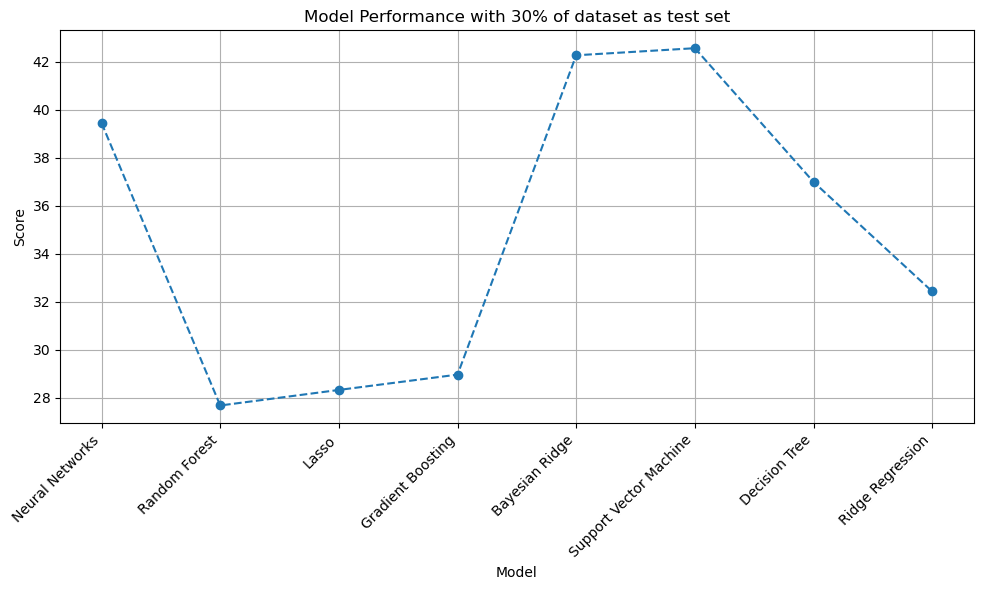

In [74]:
#sns.histplot(dferror,figure=(20,20))
import matplotlib.pyplot as plt
models=['Neural Networks','Random Forest','Lasso' ,'Gradient Boosting','Bayesian Ridge','Support Vector Machine','Decision Tree','Ridge Regression']
Score=[53.134623,38.599727,35.781371,39.950346,45.467098,46.96826,38.88,35.678933]
plt.figure(figsize=(10, 6))
plt.plot(models, dferror.T, marker='o', linestyle='--')
plt.title('Model Performance with 30% of dataset as test set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True) 
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

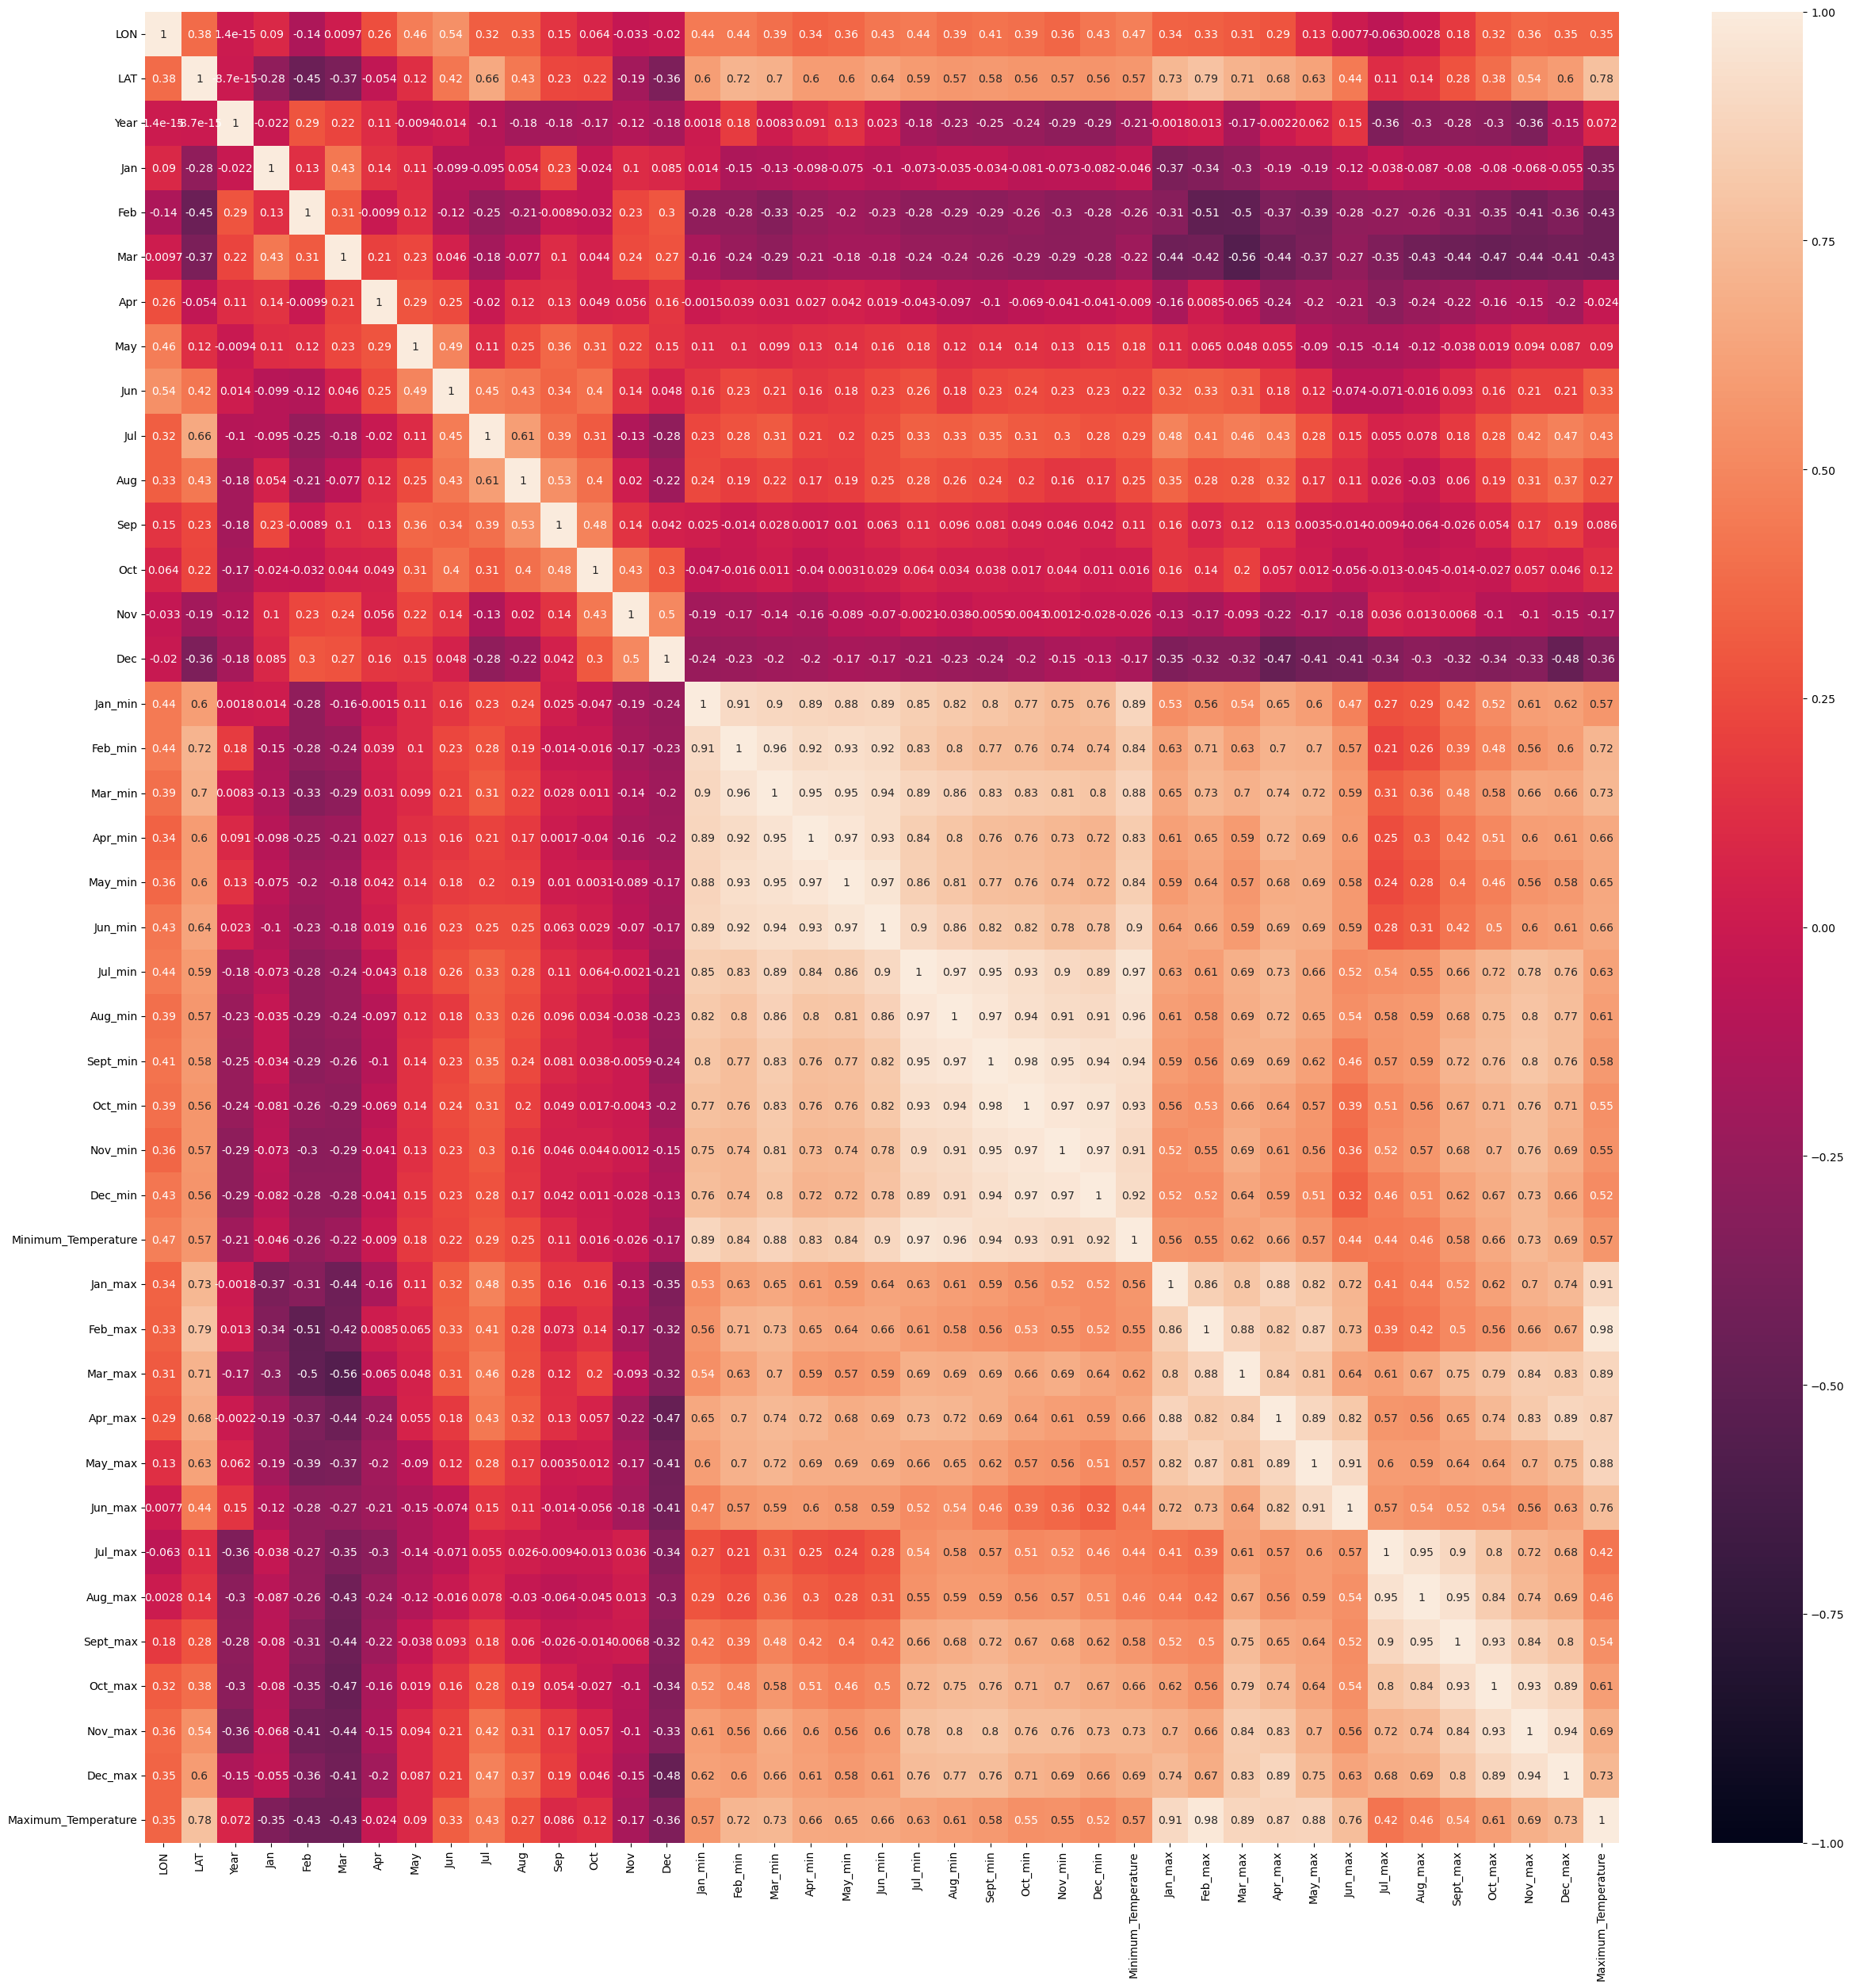

In [77]:
plt.figure(figsize=(30, 30))
sns.heatmap(training_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [117]:
# Testing with 20% size of the test set

training_data2 = dataset.drop(['Station'], axis=1)

training_features2=training_data2.drop('Dec',axis=1)
training_targets2=training_data2.loc[:,['Dec']]
xtrain32, xtest32, ytrain32, ytest32 = train_test_split(training_features2, training_targets2, test_size=0.2,random_state=42)
reg3 = Ridge(alpha = 0.1)
reg3.fit(xtrain32,ytrain32)
prediction2=reg3.predict(xtest32)
print(mean_absolute_error(ytest32,prediction2))

29.7071597863695


In [118]:
from sklearn.tree import DecisionTreeRegressor

decision2 = DecisionTreeRegressor()
decision2.fit(xtrain32,ytrain32)
decisionpredictions2 = decision2.predict(xtest32)
print(mean_absolute_error(ytest32,decisionpredictions2))

38.53230769230769


In [119]:
from sklearn.svm import SVR

svr2= SVR(kernel='poly')
svr2.fit(xtrain32,ytrain32)
svrpredictions2=svr2.predict(xtest32)
print(mean_absolute_error(ytest32,svrpredictions2))

46.256846282925004


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [120]:
from sklearn.linear_model import BayesianRidge

bayes2 = BayesianRidge()
bayes2.fit(xtrain32,ytrain32)
bayespredictions2 = bayes2.predict(xtest32)
print(mean_absolute_error(ytest32,bayespredictions2))

45.59074726772446


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [121]:
from sklearn.ensemble import GradientBoostingRegressor

xgd2 = GradientBoostingRegressor()
xgd2.fit(xtrain32,ytrain32)
xgdpredictions2 = xgd2.predict(xtest32)
print(mean_absolute_error(ytest32,xgdpredictions2))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



31.87423819344203


In [122]:
from sklearn.linear_model import Lasso

lasso2 = Lasso()
lasso2.fit(xtrain32,ytrain32)
lassopredictions2 = lasso2.predict(xtest32)
print(mean_absolute_error(ytest32,lassopredictions2))

29.656914527519532


In [123]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor()
rf2.fit(xtrain32,ytrain32)
rfpredictions2 = rf2.predict(xtest32)
print(mean_absolute_error(ytest32,rfpredictions2))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



27.485815384615385


In [124]:
from sklearn.neural_network import MLPRegressor

mlp2 = MLPRegressor(learning_rate='adaptive')
mlp2.fit(xtrain32,ytrain32)
mlppredictions2 = mlp2.predict(xtest32)
print(mean_absolute_error(ytest32,mlppredictions2))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



39.1469564994248


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [125]:
errors2 = [mean_absolute_error(ytest32,mlppredictions2),mean_absolute_error(ytest32,rfpredictions2),mean_absolute_error(ytest32,lassopredictions2),mean_absolute_error(ytest32,xgdpredictions2),mean_absolute_error(ytest32,bayespredictions2),mean_absolute_error(ytest32,svrpredictions2),mean_absolute_error(ytest32,decisionpredictions2),mean_absolute_error(ytest32,prediction2)]

In [126]:
errors2

[39.1469564994248,
 27.485815384615385,
 29.656914527519532,
 31.87423819344203,
 45.59074726772446,
 46.256846282925004,
 38.53230769230769,
 29.7071597863695]

In [127]:
dferror20=pd.DataFrame(errors2).T
dferror20.columns=['Neural Networks','Random Forest','Lasso','Gradient Boosting','Bayesian Ridge','Support Vector Regression','Decision Tree','Ridge Regression']

In [128]:
dferror20

Neural Networks  Random Forest      Lasso  Gradient Boosting  \
0        39.146956      27.485815  29.656915          31.874238   

   Bayesian Ridge  Support Vector Regression  Decision Tree  Ridge Regression  
0       45.590747                  46.256846      38.532308          29.70716

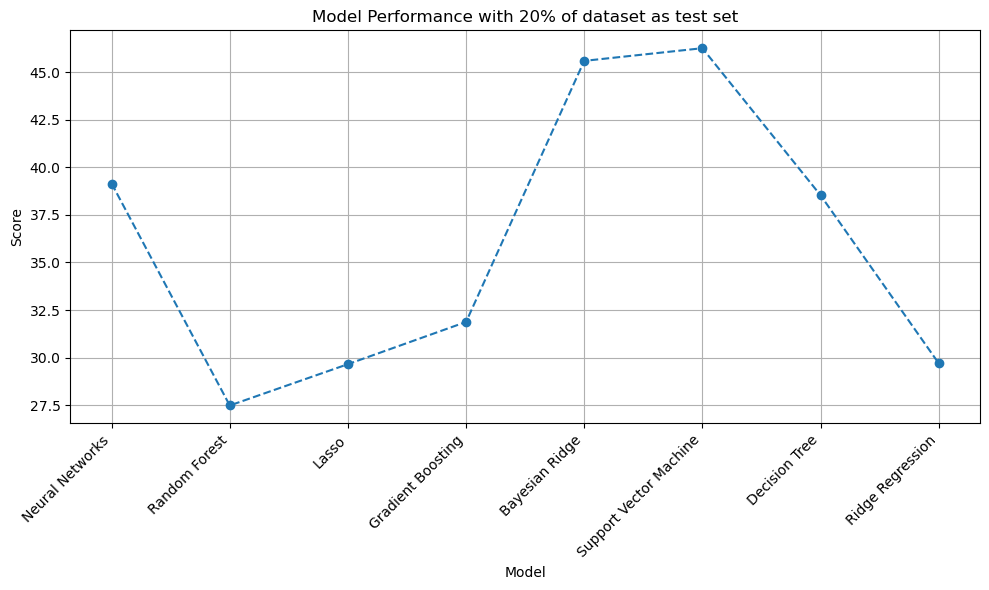

In [129]:
#sns.histplot(dferror,figure=(20,20))
import matplotlib.pyplot as plt
models=['Neural Networks','Random Forest','Lasso' ,'Gradient Boosting','Bayesian Ridge','Support Vector Machine','Decision Tree','Ridge Regression']
Score=[53.134623,38.599727,35.781371,39.950346,45.467098,46.96826,38.88,35.678933]
plt.figure(figsize=(10, 6))
plt.plot(models, dferror20.T, marker='o', linestyle='--')
plt.title('Model Performance with 20% of dataset as test set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True) 
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [98]:
# Testing with 10% size of the test set

training_data2 = dataset.drop(['Station'], axis=1)

training_features2=training_data2.drop('Dec',axis=1)
training_targets2=training_data2.loc[:,['Dec']]
xtrain32, xtest32, ytrain32, ytest32 = train_test_split(training_features2, training_targets2, test_size=0.1,random_state=42)
reg3 = Ridge(alpha = 0.1)
reg3.fit(xtrain32,ytrain32)
prediction2=reg3.predict(xtest32)
print(mean_absolute_error(ytest32,prediction2))

28.740228915262996


In [99]:
from sklearn.tree import DecisionTreeRegressor

decision2 = DecisionTreeRegressor()
decision2.fit(xtrain32,ytrain32)
decisionpredictions2 = decision2.predict(xtest32)
print(mean_absolute_error(ytest32,decisionpredictions2))

37.93538461538461


In [100]:
from sklearn.svm import SVR

svr2= SVR(kernel='poly')
svr2.fit(xtrain32,ytrain32)
svrpredictions2=svr2.predict(xtest32)
print(mean_absolute_error(ytest32,svrpredictions2))

53.46609291645652


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [101]:
from sklearn.linear_model import BayesianRidge

bayes2 = BayesianRidge()
bayes2.fit(xtrain32,ytrain32)
bayespredictions2 = bayes2.predict(xtest32)
print(mean_absolute_error(ytest32,bayespredictions2))

46.14100334816687


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [102]:
from sklearn.ensemble import GradientBoostingRegressor

xgd2 = GradientBoostingRegressor()
xgd2.fit(xtrain32,ytrain32)
xgdpredictions2 = xgd2.predict(xtest32)
print(mean_absolute_error(ytest32,xgdpredictions2))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



37.95804507170388


In [103]:
from sklearn.linear_model import Lasso

lasso2 = Lasso()
lasso2.fit(xtrain32,ytrain32)
lassopredictions2 = lasso2.predict(xtest32)
print(mean_absolute_error(ytest32,lassopredictions2))

27.64111686626648


In [104]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor()
rf2.fit(xtrain32,ytrain32)
rfpredictions2 = rf2.predict(xtest32)
print(mean_absolute_error(ytest32,rfpredictions2))

C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



34.76866923076922


In [108]:
from sklearn.neural_network import MLPRegressor

mlp2 = MLPRegressor(learning_rate='adaptive')
mlp2.fit(xtrain32,ytrain32)
mlppredictions2 = mlp2.predict(xtest32)
print(mean_absolute_error(ytest32,mlppredictions2))

62.30173548298251


C:\Users\CYBERSPACE\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [109]:
errors2 = [mean_absolute_error(ytest32,mlppredictions2),mean_absolute_error(ytest32,rfpredictions2),mean_absolute_error(ytest32,lassopredictions2),mean_absolute_error(ytest32,xgdpredictions2),mean_absolute_error(ytest32,bayespredictions2),mean_absolute_error(ytest32,svrpredictions2),mean_absolute_error(ytest32,decisionpredictions2),mean_absolute_error(ytest32,prediction2)]

In [110]:
errors2

[62.30173548298251,
 34.76866923076922,
 27.64111686626648,
 37.95804507170388,
 46.14100334816687,
 53.46609291645652,
 37.93538461538461,
 28.740228915262996]

In [114]:
dferror10=pd.DataFrame(errors2).T
dferror10.columns=['Neural Networks','Random Forest','Lasso','Gradient Boosting','Bayesian Ridge','Support Vector Regression','Decision Tree','Ridge Regression']

In [115]:
dferror10

Neural Networks  Random Forest      Lasso  Gradient Boosting  \
0        62.301735      34.768669  27.641117          37.958045   

   Bayesian Ridge  Support Vector Regression  Decision Tree  Ridge Regression  
0       46.141003                  53.466093      37.935385         28.740229

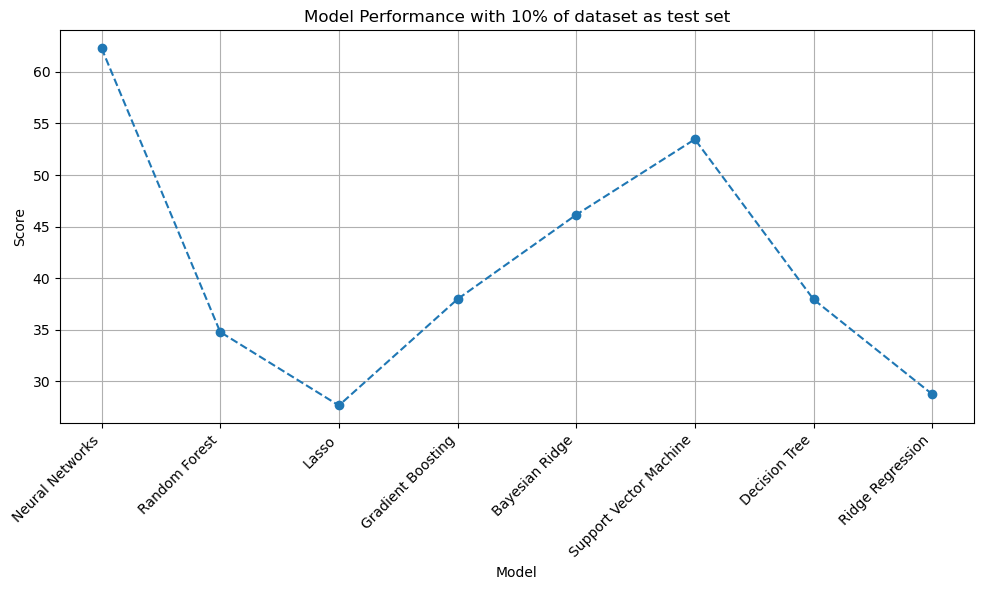

In [116]:
#sns.histplot(dferror,figure=(20,20))
import matplotlib.pyplot as plt
models=['Neural Networks','Random Forest','Lasso' ,'Gradient Boosting','Bayesian Ridge','Support Vector Machine','Decision Tree','Ridge Regression']
Score=[53.134623,38.599727,35.781371,39.950346,45.467098,46.96826,38.88,35.678933]
plt.figure(figsize=(10, 6))
plt.plot(models, dferror10.T, marker='o', linestyle='--')
plt.title('Model Performance with 10% of dataset as test set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True) 
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

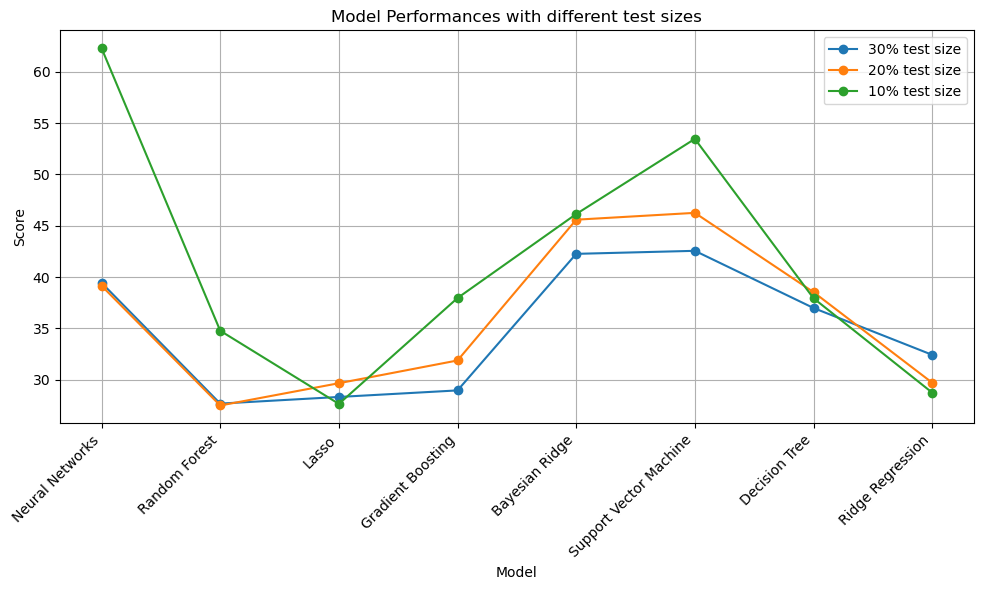

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(models,dferror.T,marker='o',label='30% test size')
plt.plot(models,dferror20.T,marker='o',label='20% test size')
plt.plot(models,dferror10.T,marker='o',label='10% test size')
plt.title('Model Performances with different test sizes')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()